# Cirq

## Installations

In [ ]:
!pip install cirq dwave-networkx dimod minorminer

     |████████████████████████████████| 88 kB 4.2 MB/s 
     |████████████████████████████████| 12.2 MB 30.6 MB/s 
     |████████████████████████████████| 3.3 MB 39.2 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 1.6 MB 29.8 MB/s 
     |████████████████████████████████| 47 kB 4.7 MB/s 
     |████████████████████████████████| 437 kB 44.9 MB/s 
     |████████████████████████████████| 328 kB 53.2 MB/s 
     |████████████████████████████████| 10.1 MB 41.9 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 145 kB 46.9 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
     |████████████████████████████████| 220 kB 45.2 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 97 kB 6.1 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 15.7 MB 43.2 MB/s 
     |█████████████████████

In [ ]:
!pip install qutip

     |████████████████████████████████| 14.6 MB 11 kB/s 


In [ ]:
!pip install pylatex

     |████████████████████████████████| 84 kB 2.7 MB/s 
  Created wheel for pylatex: filename=PyLaTeX-1.4.1-py3-none-any.whl size=42814 sha256=f5038767cef4a248eadfaa579411336f2c8862cc50dc23b4621d99930b9a4eab
  Stored in directory: /root/.cache/pip/wheels/4c/62/73/7688c83647b2103ef0c1b783730c8dc50fbbc3667eea6b1cb8
  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8219 sha256=b04de69d393e7e1ae1b348671271477cc059159c2715b9fd50bde1d820b2ae9f
  Stored in directory: /root/.cache/pip/wheels/73/2b/f6/26e9f84153c25050fe7c09e88f8e32a6be3c7034a38c418319
Successfully built pylatex ordered-set


## Imports

In [ ]:
import matplotlib 
import networkx 
import numpy 
import sklearn 
import scipy 
import cirq 
import dwave_networkx 
import dimod 
import minorminer
import qutip
import matplotlib
import sys
import numpy as np
from cirq import GridQubit, Circuit
from cirq import Simulator

In [ ]:



print('python    :', sys.version)
print('cirq version       :',cirq.__version__)
print('qutip version      :',qutip.__version__)
print('matplotlib version :',matplotlib.__version__)
print('sklearn version    :',sklearn.__version__)

python    : 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
cirq version       : 0.13.1
qutip version      : 4.6.2
matplotlib version : 3.2.2
sklearn version    : 1.0.1


## Backend

In [ ]:
# Simulator: it runs a quantum algorithm and writes the measurement results out classically. 
# After running a circuit a few times on the simulator, 
# we can inspect the statistics of the results. 
# For simplicity, we'll use the Simulator class:
simulator = Simulator()

In [ ]:

# Building the simplest possible circuit that has no gates and only a measurement on a single qubit, writing out the result classically to the key m:
q = GridQubit(0,0)
circuit = cirq.Circuit(cirq.measure(q, key = 'm'))

# We execute this circuit on the simulator and observe the statistics:
result = simulator.run(circuit, repetitions=100)
print(result.histogram(key='m'))

Counter({0: 100})


##Visualization


There are three handy ways of visualizing what we are doing. The first one is drawing the circuit. Cirq has built-in functionality to convert a circuit into a text diagram:

In [ ]:

q = GridQubit(0,0)
circuit = cirq.Circuit(
    cirq.measure(q, key='m')
)

print(circuit.to_text_diagram())

(0, 0): ───M('m')───


In [ ]:
from cirq.contrib.qcircuit.qcircuit_diagram import circuit_to_latex_using_qcircuit 
from pylatex import Document, NoEscape, Package 
from tempfile import mkdtemp 
import matplotlib.pyplot as plt 
import shutil 
import subprocess 
import time
%matplotlib inline 

def plot_circuit(circuit):

    tex = circuit_to_latex_using_qcircuit(circuit)

    doc = Document(documentclass='standalone',
                   document_options=NoEscape('border=25pt,convert={density=300,outext=.png}'))

    doc.packages.append(Package('amsmath'))

    doc.packages.append(Package('qcircuit'))

    doc.append(NoEscape(tex))

    tmp_folder = mkdtemp()

    doc.generate_tex(tmp_folder + '/circuit') 
    convert_log = open(tmp_folder+'/pdflatex.log', 'w') 
    proc = subprocess.Popen(['pdflatex', '-shell-escape', tmp_folder + '/circuit.tex'], cwd=tmp_folder, 
           stdout = convert_log, stderr = convert_log)
    proc.communicate()
    convert_log.close() 
    image = plt.imread(tmp_folder + '/circuit.png') 
    shutil.rmtree(tmp_folder) 
    plt.axis('off') 
    return plt.imshow(image) 

plot_circuit(circuit)

In [ ]:

import cmath
from qutip import Bloch

def get_vector(alpha, beta):
    """
    Function to compute 3D Cartesian coordinates
    from 2D qubit vector.
    """

    # get phases
    angle_alpha = cmath.phase(alpha)
    angle_beta = cmath.phase(beta)

    # avoiding wrong normalization due to rounding errors
    if cmath.isclose(angle_alpha, cmath.pi):
        angle_alpha = 0
    if cmath.isclose(angle_beta, cmath.pi):
        angle_beta = 0
        
    if (angle_beta < 0 and angle_alpha < angle_beta) or (angle_beta > 0 and angle_alpha > angle_beta):
            denominator = cmath.exp(1j*angle_beta)
    else:
            denominator = cmath.exp(1j*angle_alpha)

    # eliminate global phase
    alpha_new = alpha/denominator
    beta_new = beta/denominator

    # special case to avoid division by zero
    if abs(alpha) == 0 or abs(beta) == 0:
        if alpha == 0:
            return [0,0,-1]
        else:
            return [0,0,1]
    else:
        # compute theta and phi from alpha and beta
        theta = 2*cmath.acos(alpha_new)
        phi = -1j*cmath.log(beta_new/cmath.sin(theta/2))

        # compute the Cartesian coordinates
        x = cmath.sin(theta)*cmath.cos(phi)
        y = cmath.sin(theta)*cmath.sin(phi)
        z = cmath.cos(theta)

    return [x.real, y.real, z.real]

def plot_quantum_state(amplitudes):
    """
    Thin function to abstract the plotting on the Bloch sphere.
    """
    bloch_sphere = Bloch()
    vec = get_vector(amplitudes[0], amplitudes[1])
    bloch_sphere.add_vectors(vec)
    bloch_sphere.show()
    bloch_sphere.clear()

measurements: (no measurements)
output vector: |0⟩


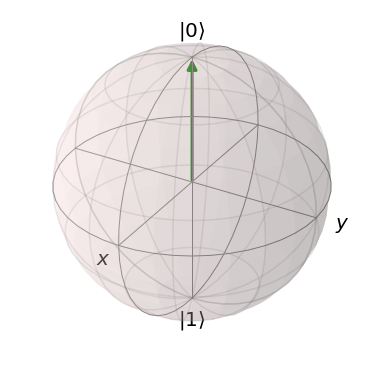

In [ ]:
# comparing the initial state ∣0⟩ and the Hadamard gate applied to it:
circuit = cirq.Circuit(cirq.I(q))
result = simulator.simulate(circuit)
print(result)
plot_quantum_state(result.final_state_vector)

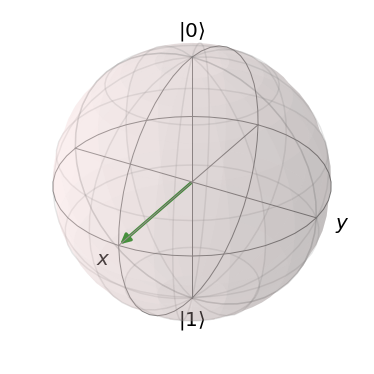

In [ ]:

# After the Hadamard gate:
circuit = cirq.Circuit(
    cirq.H(q))
result = simulator.simulate(circuit)
plot_quantum_state(result.final_state_vector)


The third way of visualizing what happens 
is plotting the statistics of measurement results. Arguably, this is the most important for practical applications and debugging. We define a function for this:

In [ ]:

import matplotlib.pyplot as plt

def plot_histogram(counts):
    x = np.arange(len(counts))
    plt.bar(x, counts.values())
    plt.xticks(x, counts.keys())
    plt.show()

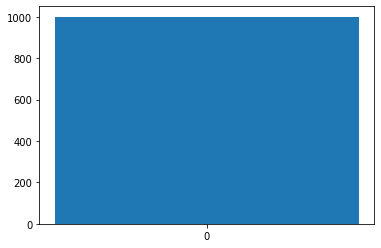

In [ ]:

# The statistics before the Hadamard gate:
circuit = cirq.Circuit(
    cirq.measure(q, key='m')
)

results = simulator.run(circuit, repetitions=1000)
plot_histogram(results.histogram(key='m'))

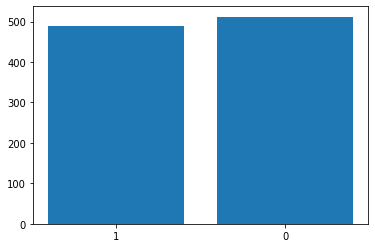

In [ ]:

# After the Hadamard gate:
circuit = cirq.Circuit(
   cirq.H(q),
   cirq.measure(q, key='m')
)

results = simulator.run(circuit, repetitions=1000)
plot_histogram(results.histogram(key='m'))

## Classical_and_Quantum_Probability_Distributions

In [ ]:
# Classical
n_samples = 100 
p_1 = 0.2 
x_data = np.random.binomial(1, p_1, (n_samples,)) 
print(x_data)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0]


In [ ]:

# naturally expect that the empirically observed frequencies also sum to one:
frequency_of_zeros, frequency_of_ones = 0, 0
for x in x_data:
    if x:
        frequency_of_ones += 1/n_samples
    else:
        frequency_of_zeros += 1/n_samples
print(frequency_of_ones+frequency_of_zeros)

1.0000000000000004


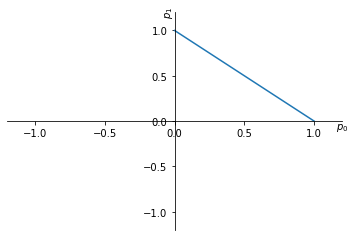

In [ ]:

# This plot describes all possible 
# probability distributions by 
# biased and unbiased coins.

p_0 = np.linspace(0, 1, 100)
p_1 = 1-p_0
fig, ax = plt.subplots()
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xlabel("$p_0$")
ax.xaxis.set_label_coords(1.0, 0.5)
ax.set_ylabel("$p_1$")
ax.yaxis.set_label_coords(0.5, 1.0)
plt.plot(p_0, p_1)

In [ ]:
# probability distribution
p = np.array([[0.8], [0.2]])
np.linalg.norm(p, ord=1)

1.0

In [ ]:
# Probability of heads
Π_0 = np.array([[1, 0], [0, 0]])
np.linalg.norm(Π_0 @ p, ord=1)

0.8

In [ ]:
# The probability of tails:
Π_1 = np.array([[0, 0], [0, 1]])
np.linalg.norm(Π_1 @ p, ord=1)

0.2

What happens when we want to transform a probability distribution to another one? For instance, to change the bias of a coin, or to describe the transition of a Markov chain. Since the probability distribution is also a stochastic vector, we can apply a matrix on the vector, where the matrix has to fulfill certain conditions. A left stochastic matrix will map stochastic vectors to stochastic vectors when multiplied from the left: its columns add up to one. In other words, it maps probability distributions to probability distributions. For example, starting with a unbiased coin, the map M will transform the distribution to a biased coin:

In [ ]:

p = np.array([[.5], [.5]])
M = np.array([[0.7, 0.6], [0.3, 0.4]])
np.linalg.norm(M @ p, ord=1)

0.9999999999999999

One last concept that will come handy is entropy. A probability distribution's entropy is defined as $H(p)=−∑_i​p_i​log_2​p_i​$. Let us plot it over all possible probability distributions of coin tosses:

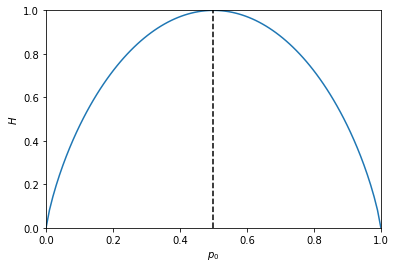

In [ ]:

ϵ = 10e-10
p_0 = np.linspace(ϵ, 1-ϵ, 100)
p_1 = 1-p_0
H = -(p_0*np.log2(p_0) + p_1*np.log2(p_1))
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, -np.log2(0.5))
ax.set_xlabel("$p_0$")
ax.set_ylabel("$H$")
plt.plot(p_0, H)
plt.axvline(x=0.5, color='k', linestyle='--')

Here we can see that the entropy is maximal for the unbiased coin. This is true in general: the entropy peaks for the uniform distribution. In a sense, this is the most unpredictable distribution: if we get heads with probability 0.2, betting tails is a great idea. On the other hand, if the coin is unbiased, then a deterministic strategy is of little help in winning. Entropy quantifies this notion of surprise and unpredictability.

## Quantum states


For notational convenience that will become apparent later, we write the label of a quantum state in what is called a ket in the Dirac notation. So for instance, for some qubit, we can write 
$∣ψ⟩ $= $\begin{bmatrix} 
a_0​ \\ a_1​​
\end{bmatrix}$.
In other words, a ket is just a column vector, exactly like the stochastic vector in the classical case.

In [ ]:

zero_ket = np.array([[1], [0]])
print("|0> ket:\n", zero_ket)
print("<0| bra:\n", zero_ket.T.conj())

|0> ket:
 [[1]
 [0]]
<0| bra:
 [[1 0]]


In [ ]:

zero_ket.T.conj() @ zero_ket

array([[1]])

## Measurements

In [ ]:

ψ = np.array([[1], [1]])/np.sqrt(2)
Π_0 = zero_ket @ zero_ket.T.conj()
ψ.T.conj() @ Π_0 @ ψ

array([[0.5]])


Create an equal superposition with the Hadamard gate (see a later notebook for quantum circuits), apply the measurement, and observe the statistics:

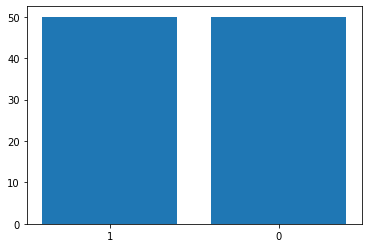

In [ ]:

simulator = Simulator()
q = GridQubit(0, 0)
circuit = Circuit(
    cirq.H(q),
    cirq.measure(q, key='m')
)
results = simulator.run(circuit, repetitions=100)
plot_histogram(results.histogram(key='m'))

###Measuring multiqubit systems

Most quantum computers implement local measurements, which means that each qubit is measured separately.

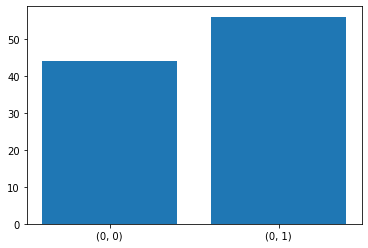

In [ ]:

q = [GridQubit(x, 0) for x in range(2)]
circuit = Circuit(
    cirq.H(q[0]),
    cirq.measure(q[0], key='m0'),
    cirq.measure(q[1], key='m1')
)
results = simulator.run(circuit, repetitions=100)
plot_histogram(results.multi_measurement_histogram(keys=['m1', 'm0']))


### Measurements on an entangled state? 

Let's look at the statistics again on the ∣ϕ+⟩ state:

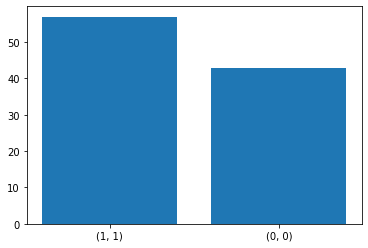

In [ ]:

q = [GridQubit(x, 0) for x in range(2)]
circuit = Circuit(
    cirq.H(q[0]),
    cirq.CNOT(q[0], q[1]),
    cirq.measure(q[0], key='m0'),
    cirq.measure(q[1], key='m1')
)
results = simulator.run(circuit, repetitions=100)
plot_histogram(results.multi_measurement_histogram(keys=['m1', 'm0']))


### Mixed states
The Born rule still applies, but now we have to take the trace of the result: for instance, Tr[∣0⟩⟨0∣ρ] would be the probability of seeing 0. See it in action:

In [ ]:

ψ = np.array([[1], [1]])/np.sqrt(2)
ρ = ψ @ ψ.T.conj()
Π_0 = zero_ket @ zero_ket.T.conj()
np.trace(Π_0 @ ρ)

0.4999999999999999


### Compare the density matrix of the equal superposition:

2​1​(∣0⟩+∣1⟩) and the mixed state 0.5(∣0⟩⟨0∣+∣1⟩⟨1∣):

In [ ]:

zero_ket = np.array([[1], [0]])
one_ket = np.array([[0], [1]])
ψ = (zero_ket + one_ket)/np.sqrt(2)
print("Density matrix of the equal superposition")
print(ψ @ ψ.T.conj())
print("Density matrix of the equally mixed state of |0><0| and |1><1|")
print((zero_ket @ zero_ket.T.conj()+one_ket @ one_ket.T.conj())/2)

Density matrix of the equal superposition
[[0.5 0.5]
 [0.5 0.5]]
Density matrix of the equally mixed state of |0><0| and |1><1|
[[0.5 0. ]
 [0.  0.5]]



The off-diagonal elements are gone in the second case. The off-diagonal elements are also called coherences: their presence indicates that the state is quantum. The smaller these values are, the closer the quantum state is to a classical probability distribution.

The second density matrix above has only diagonal elements and they are equal: this is the equivalent way of writing a uniform distribution. We know that the uniform distribution has maximum entropy, and for this reason, a density matrix with this structure is called a maximally mixed state. In other words, we are perfectly ignorant of which elements of the canonical basis constitute the state

## Evolution_in_Closed_and_Open_Systems

###Unitary evolution

A unitary matrix has the property that its conjugate transpose is its inverse.

In [ ]:

# Let's check if it is indeed unitary:
X = np.array([[0, 1], [1, 0]])
print("XX^dagger")
print(X @ X.T.conj())
print("X^daggerX")
print(X.T.conj() @ X)

XX^dagger
[[1 0]
 [0 1]]
X^daggerX
[[1 0]
 [0 1]]


It looks like a legitimate unitary operation. The unitary nature ensures that the l2​ norm is preserved, that is, quantum states are mapped to quantum states.

In [ ]:

print("The norm of the state |0> before applying X")
zero_ket = np.array([[1], [0]])
print(np.linalg.norm(zero_ket))
print("The norm of the state after applying X")
print(np.linalg.norm(X @ zero_ket))

The norm of the state |0> before applying X
1.0
The norm of the state after applying X
1.0


Furthermore, since the unitary operation is a matrix, it is linear. Measurements are also represented by matrices. These two observations imply that everything a quantum computer implements is actually linear. If we want to see some form of nonlinearity, that must involve some classical intervention.

Another consequence of the unitary operations is reversibility. Any unitary operation can be reversed. Quantum computing libraries often provide a function to reverse entire circuits. Reversing the X gate is simple: we just apply it again (its conjugate transpose is itself, therefore X2=1).

In [ ]:

np.set_printoptions(precision=3, suppress=True)

simulator = Simulator()
q = GridQubit(0, 0)
circuit = Circuit(
    cirq.X(q),
    cirq.X(q),
    cirq.measure(q, key='m')
)

result = simulator.simulate(circuit)
print(result.final_state_vector)

[1.+0.j 0.+0.j]


which is exactly ∣0⟩ as we would expect.

### Interaction with the environment: Open systems

In [ ]:

def mixed_state(pure_state, visibility):
    density_matrix = pure_state @ pure_state.T.conj()
    maximally_mixed_state = np.eye(4)/2**2
    return visibility*density_matrix + (1-visibility)*maximally_mixed_state

ϕ = np.array([[1],[0],[0],[1]])/np.sqrt(2)
print("Maximum visibility is a pure state:")
print(mixed_state(ϕ, 1.0))
print("The state is still entangled with visibility 0.8:")
print(mixed_state(ϕ, 0.8))
print("Entanglement is lost by 0.6:")
print(mixed_state(ϕ, 0.6))
print("Barely any coherence remains by 0.2:")
print(mixed_state(ϕ, 0.2))

Maximum visibility is a pure state:
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
The state is still entangled with visibility 0.8:
[[0.45 0.   0.   0.4 ]
 [0.   0.05 0.   0.  ]
 [0.   0.   0.05 0.  ]
 [0.4  0.   0.   0.45]]
Entanglement is lost by 0.6:
[[0.4 0.  0.  0.3]
 [0.  0.1 0.  0. ]
 [0.  0.  0.1 0. ]
 [0.3 0.  0.  0.4]]
Barely any coherence remains by 0.2:
[[0.3 0.  0.  0.1]
 [0.  0.2 0.  0. ]
 [0.  0.  0.2 0. ]
 [0.1 0.  0.  0.3]]


### thermal state follows a Boltzmann distribution. 

The Boltzmann -- also called Gibbs -- distribution is described as $P(E_i) = \frac {e^{-E_{i}/T}}{\sum {j=1}^{M}{e^{-E{j}/T}}}$, where E_i​ is an energy, and M is the total number of possible energy levels.

[]

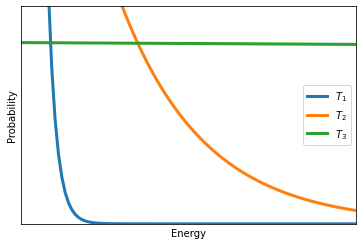

In [ ]:

# Plot the Boltzmann distribution with vastly different temperatures:
 #import matplotlib.pyplot as plt

temperatures = [.5, 5, 2000]
energies = np.linspace(0, 20, 100)
fig, ax = plt.subplots()
for i, T in enumerate(temperatures):
    probabilities = np.exp(-energies/T)
    Z = probabilities.sum()
    probabilities /= Z
    ax.plot(energies, probabilities, linewidth=3, label = "$T_" + str(i+1)+"$")
ax.set_xlim(0, 20)
ax.set_ylim(0, 1.2*probabilities.max())
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Energy')
ax.set_ylabel('Probability')
ax.legend()
plt.plot()

Here $T_1​<T_2​<T_3​$. Notice that T1​ is a low temperature, and therefore it is highly peaked at low energy levels. In contrast, $T_3$​ is a very high temperature and the probability distribution is almost completely flat.

##Classical_and_Quantum_Many-Body_Physics

The concepts to be introduced below, such as the Ising model, simulated annealing, and the transverse Ising model, play an important role in today's quantum algorithms and quantum computing paradigms, including quantum annealing, the quantum approximate optimization algorithm, and quantum-enhanced sampling. Here we give some insight on how these physical building blocks work

### Annealing: 

Annealing inspired a heuristic algorithm called simulated annealing. This defines a temperature to be able to hop out of local minima. The temperature is lowered over time to find the actual minimum. Simulated annealing has many implementations. Here we'll use the one implemented in dimod to solve our problem above:

In [ ]:
import dimod


The simulated annealing solver requires us to define the couplings as a dictionary between spins, and we must also pass the external field values as a dictionary. The latter is all zeros for us.

In [ ]:

J = {(0, 1): 1.0, (1, 2): -1.0}
h = {0:0, 1:0, 2:0}


We instantiate an Ising model:

In [ ]:

model = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.SPIN)


Finally, we create a simulated annealing sampler that pulls out potentially optimal solutions, and we read out 10 possible solutions:

In [ ]:

sampler = dimod.SimulatedAnnealingSampler()
response = sampler.sample(model, num_reads=10)

You can see that this configuration is actually easy, since you get the optimal solution -2 most of the time:

In [ ]:

[solution.energy for solution in response.data()].count(-2)

10

### The transverse-field Ising model

In quantum mechanics, the Hamiltonian is not a function of variables, but of operators. We will simulate what it means in a quantum circuit.

In [ ]:
np.set_printoptions(precision=3, suppress=True)
simulator = Simulator()
q = GridQubit(0, 0)

In [ ]:

# The operator that replicates the effect of what we have seen in the classical case is the Pauli-Z matrix. 
# Let's see what it does on the elements of the computational basis:
circuit = Circuit(
    cirq.Z(q),
    cirq.measure(q, key='m')
) 
result = simulator.simulate(circuit) 
print(result.final_state_vector)

Creating the quantum mechanical version of calculating the energy, matching the function we defined above for the classical mechanical variant:

In [ ]:

def calculate_energy_expectation(state, hamiltonian):
    return float((state.T.conj() @ hamiltonian @ state).real)

In [ ]:
PauliZ = np.array([[1, 0], [0, -1]]) 
IZ = np.kron(np.eye(2), PauliZ) 
ZI = np.kron(PauliZ, np.eye(2)) 
ZZ = np.kron(PauliZ, PauliZ) 
H = -ZZ + -0.5*(ZI+IZ) 
ψ = np.kron([[1], [0]], [[1], [0]]) 
calculate_energy_expectation(ψ, H)

## Gate-Model_Quantum_Computing

### The adiabatic theorem and adiabatic quantum computing

Adiabatic quantum computation

In [ ]:

import numpy as np
np.set_printoptions(precision=3, suppress=True)

X = np.array([[0, 1], [1, 0]])
IX = np.kron(np.eye(2), X)
XI = np.kron(X, np.eye(2))
H_0 = - (IX + XI)
λ, v = np.linalg.eigh(H_0)
print("Eigenvalues:", λ)
print("Eigenstate for lowest eigenvalue", v[:, 0])

Eigenvalues: [-2. -0.  0.  2.]
Eigenstate for lowest eigenvalue [0.5 0.5 0.5 0.5]


In [ ]:

#import numpy as np
np.set_printoptions(precision=3, suppress=True)

X = np.array([[0, 3], [3, 0]])
IX = np.kron(np.eye(2), X)
XI = np.kron(X, np.eye(2))
H_0 = - (IX + XI)
λ, v = np.linalg.eigh(H_0)
print("Eigenvalues:", λ)
print("Eigenstate for lowest eigenvalue", v[:, 0])

Eigenvalues: [-6. -0.  0.  6.]
Eigenstate for lowest eigenvalue [0.5 0.5 0.5 0.5]


In [ ]:

import dimod

J = {(0, 1): 1.0, (1, 2): -1.0}
h = {0:0, 1:0, 2:0}
model = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.SPIN)
sampler = dimod.SimulatedAnnealingSampler()
response = sampler.sample(model, num_reads=10)
print("Energy of samples:")
print([solution.energy for solution in response.data()])

### Quantum annealing

In [ ]:
!pip install dwave_networkx

     |████████████████████████████████| 88 kB 6.3 MB/s 
     |████████████████████████████████| 12.2 MB 29.0 MB/s 
     |████████████████████████████████| 67 kB 7.2 MB/s 
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.6
    Uninstalling pyparsing-3.0.6:
      Successfully uninstalled pyparsing-3.0.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install minorminer

     |████████████████████████████████| 3.3 MB 27.8 MB/s 


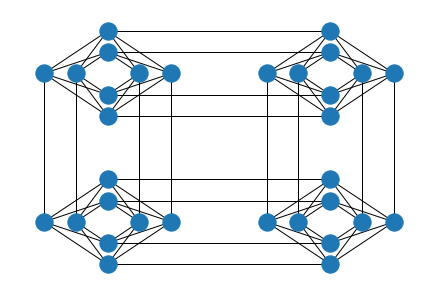

In [ ]:
import matplotlib.pyplot as plt 
import dwave_networkx as dnx 
%matplotlib inline 

connectivity_structure = dnx.chimera_graph(2, 2) 
dnx.draw_chimera(connectivity_structure) 
plt.show()

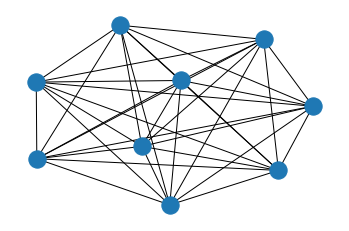

In [ ]:
import networkx as nx

G = nx.complete_graph(9)
plt.axis('off') 
nx.draw_networkx(G, with_labels=False)

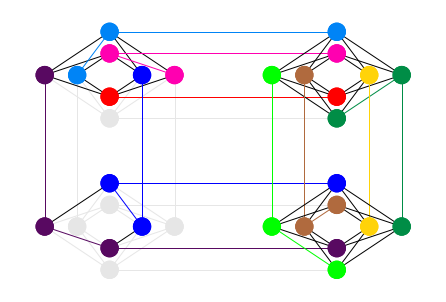

In [ ]:
import minorminer

embedded_graph = minorminer.find_embedding(G.edges(), connectivity_structure.edges())
 
# Let's plot this embedding:
dnx.draw_chimera_embedding(connectivity_structure, embedded_graph)
plt.show()


Qubits that have the same colour corresponding to a logical node in the original problem defined by the K9​ graph. Qubits combined in such way form a chain. Even though our problem only has 9 variables (nodes), we used almost all 32 available on the toy Chimera graph. Let's find the maximum chain length:

In [ ]:

max_chain_length = 0
for _, chain in embedded_graph.items():
    if len(chain) > max_chain_length:
        max_chain_length = len(chain)
print(max_chain_length)

4


## Quantum approximate optimization algorithm

In [ ]:

from scipy.optimize import minimize
np.set_printoptions(precision=3, suppress=True)

In [ ]:

def beta_layer(beta, a, b):
    yield (cirq.X**(-beta)).on_each([a, b])

In [ ]:
# You can use this function to create a circuit.

a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")
circuit = cirq.Circuit()
circuit.append(beta_layer(0.1, a, b))
plot_circuit(circuit)

In [ ]:
class ZZGate(cirq.ops.gate_features.TwoQubitGate):
    def __init__(self, gamma):
        self.gamma = gamma
    
    def _decompose_(self, qubits):
        a, b = qubits
        yield cirq.CZ(a, b)**(-self.gamma),
        yield cirq.X(b),
        yield cirq.CZ(a, b)**self.gamma,
        yield cirq.X.on_each([a, b]),
        yield cirq.CZ(a, b)**self.gamma,
        yield cirq.X(b),
        yield cirq.CZ(a, b)**(-self.gamma)
        yield cirq.X.on_each([a, b]),

    # How should the gate look in ASCII diagrams?
    def _circuit_diagram_info_(self, args):
        return cirq.protocols.CircuitDiagramInfo(
            wire_symbols=('Z', 'Z'),
            exponent=self.gamma)

In [ ]:
def gamma_layer(gamma, a, b):
    yield ZZGate(gamma).on(a, b)

circuit = cirq.Circuit()
circuit.append(gamma_layer(0.1, a, b))
circuit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: TwoQubitGate was used but is deprecated.
It will be removed in cirq v0.14.
Define _num_qubits_ manually.

  


a: ───Z───────
      │
b: ───Z^0.1───

In [ ]:
# We can check that the matrix expression 
# of this operator is what we expeced.

print(circuit.to_unitary_matrix().round(5))

gamma = 0.1
test_matrix = np.array([[np.exp(-1j*np.pi*gamma),0, 0, 0],
                        [0, np.exp(1j*np.pi*gamma), 0, 0],
                        [0, 0, np.exp(1j*np.pi*gamma), 0],
                        [0, 0, 0, np.exp(-1j*np.pi*gamma)]])
print ("\n")
print (test_matrix.round(5))

In [ ]:
# The initial state is a uniform 
# superposition of all the states. 
# It can be created using Hadamard 
# gates on all the qubits.
 
def create_cirquit(betas, gammas):
    circuit = cirq.Circuit()
    circuit.append(cirq.H.on_each([a, b]))
    for beta, gamma in zip(betas, gammas):
        circuit.append(beta_layer(beta, a, b))
        circuit.append(gamma_layer(gamma, a, b))
    return circuit

In [ ]:
# For example, we can create a circuite 
# with 4 steps with random parameters. 

p = 4
betas = np.random.uniform(0, np.pi*2, p)
gammas = np.random.uniform(0, np.pi*2, p)
circuit = create_cirquit(betas, gammas)
circuit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: TwoQubitGate was used but is deprecated.
It will be removed in cirq v0.14.
Define _num_qubits_ manually.

  


a: ───H───X^(6/11)───Z────────X^(2/3)───Z────────X^-0.885───Z────────X^0.986───Z────────
                     │                  │                   │                  │
b: ───H───X^(6/11)───Z^3.48───X^(2/3)───Z^2.34───X^-0.885───Z^1.48───X^0.986───Z^6.16───

In [ ]:
# To apply the optimizaion for variational 
# parameters, we define two auxiliary functions. 

"The function energy_from_params simulate the cirquit" 
"operation with given parameters, and return the" 
"expectation value of cost Hamiltonian for the resulting qubits state." 

def energy_from_params(betas, gammas):
    sim = cirq.Simulator()
    circuit = create_cirquit(betas, gammas)
    wf = sim.simulate(circuit).final_state
    return -np.sum(np.abs(wf)**2 * np.array([1, -1, -1, 1])) 

"evaluate_circuit is a wrapper function that the optimizer in SciPy can consume."

def evaluate_circuit(beta_gamma):
    betas = beta_gamma[:p]
    gammas = beta_gamma[p:]
    return energy_from_params(betas, gammas)

In [ ]:
# Finally, we optimize the angles:

result = minimize(evaluate_circuit,
                  np.concatenate([betas, gammas]),
                  method='L-BFGS-B', options={'eps': 0.0001})
result

### Analysis of the results

In [ ]:
# We create a circuit using the optimal 
# parameters found.

betas = result['x'][:p]
gammas = result['x'][p:]
circuit = create_cirquit(betas, gammas)

In [ ]:
# We use the Cirq's simulator in order 
# to display the state created by the circuit.

wf = cirq.Simulator().simulate(circuit).final_state
wf

In [ ]:
# Let's now try to evaluate the 
# operators σ1Z​ and σ2Z​ independently:
 
print(np.sum(np.abs(wf)**2 * np.array([1, 1, -1, -1])))
print(np.sum(np.abs(wf)**2 * np.array([1, -1, 1, -1])))

## Discrete_Optimization_and_Ensemble_Learning


### Loss Functions and Regularization
If you can solve a problem by a classical computer -- let that be a laptop or a massive GPU cluster -- there is little value in solving it by a quantum computer that costs ten million dollars. The interesting question in quantum machine learning is whether there are problems in machine learning and AI that fit quantum computers naturally, but are challenging on classical hardware. This, however, requires a good understanding of both machine learning and contemporary quantum computers.
Let us take a look at the easiest possible problem: the data points split into two, easily distinguishable sets. We randomly generate this data set:

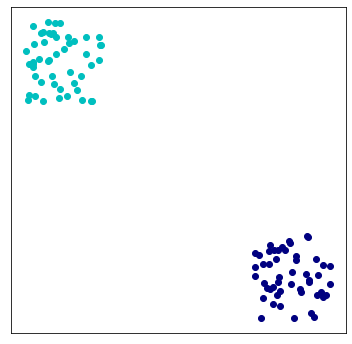

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

c1 = np.random.rand(50, 2)/5
c2 = (-0.6, 0.5) + np.random.rand(50, 2)/5
data = np.concatenate((c1, c2))
labels = np.array([0] * 50 + [1] *50)
plt.figure(figsize=(6, 6))
plt.subplot(111, xticks=[], yticks=[])
plt.scatter(data[:50, 0], data[:50, 1], color='navy')
plt.scatter(data[50:, 0], data[50:, 1], color='c')

Let's shuffle the data set into a training set that we are going to optimize over (2/3 of the data), and a test set where we estimate our generalization performance.

In [ ]:

idx = np.arange(len(labels))
np.random.shuffle(idx)
# train on a random 2/3 and test on the remaining 1/3
idx_train = idx[:2*len(idx)//3]
idx_test = idx[2*len(idx)//3:]
X_train = data[idx_train]
X_test = data[idx_test]
y_train = labels[idx_train]
y_test = labels[idx_test]

In [ ]:

import sklearn
import sklearn.metrics
metric = sklearn.metrics.accuracy_score

Let's train a perceptron, which has a linear loss function N1​∑i=1N​∣h(xi​)−yi​)∣:

In [ ]:

from sklearn.linear_model import Perceptron
model_1 = Perceptron(max_iter=1000, tol=1e-3)
model_1.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_1.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_1.predict(X_test))))

accuracy (train):  1.00
accuracy (test):  1.00



 
It does a great job. It is a linear model, meaning its decision surface is a plane. Our dataset is separable by a plane, so let's try another linear model, but this time a **support vector machine**. If you eyeball our dataset, you will see that to define the separation between the two classes, actually **only a few points close to the margin are relevant. These are called support vectors and support vector machines aim to find them**. Its **objective function measures the loss and it has a regularization term with a weight C**. The C hyperparameter controls a regularization term that penalizes the objective for the number of support vectors:

In [ ]:

from sklearn.svm import SVC
model_2 = SVC(kernel='linear', C=10)
model_2.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_2.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_2.predict(X_test))))
print('Number of support vectors:', sum(model_2.n_support_))

accuracy (train):  1.00
accuracy (test):  1.00
Number of support vectors: 2



 
It picks only two datapoints out of the hundred. Let's change the hyperparameter to reduce the penalty:

In [ ]:

model_2 = SVC(kernel='linear', C=0.01)
model_2.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_2.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_2.predict(X_test))))
print('Number of support vectors:', sum(model_2.n_support_))

accuracy (train):  0.55
accuracy (test):  0.41
Number of support vectors: 60


You can see that the model gets confused by using too many datapoints in the final classifier. This is one example where regularization helps.


 
### Ensemble methods
Ensembles yield better results when there is considerable diversity among the base classifiers. If diversity is sufficient, base classifiers make different errors, and a strategic combination may reduce the total error, ideally improving generalization performance. A constituent model in an ensemble is also called a base classifier or weak learner, and the composite model a strong learner.
The generic procedure of ensemble methods has two steps. First, develop a set of base classifiers from the training data. Second, combine them to form the ensemble. In the simplest combination, the base learners vote, and the label prediction is based on majority. More involved methods weigh the votes of the base learners. 
Let us import some packages and define our figure of merit as accuracy in a balanced dataset.

In [ ]:
import sklearn.datasets 
import sklearn.metrics
%matplotlib inline

metric = sklearn.metrics.accuracy_score


We generate a random dataset of two classes that form concentric circles:

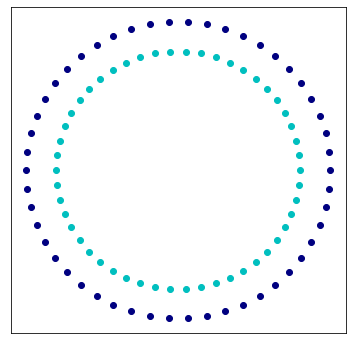

In [ ]:
np.random.seed(0)
data, labels = sklearn.datasets.make_circles()
idx = np.arange(len(labels))
np.random.shuffle(idx)
# train on a random 2/3 and test on the remaining 1/3
idx_train = idx[:2*len(idx)//3]
idx_test = idx[2*len(idx)//3:]
X_train = data[idx_train]
X_test = data[idx_test]

y_train = 2 * labels[idx_train] - 1  # binary -> spin
y_test = 2 * labels[idx_test] - 1

scaler = sklearn.preprocessing.StandardScaler()
normalizer = sklearn.preprocessing.Normalizer()

X_train = scaler.fit_transform(X_train)
X_train = normalizer.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)
X_test = normalizer.fit_transform(X_test)
plt.figure(figsize=(6, 6))
plt.subplot(111, xticks=[], yticks=[])
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], color='navy')
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], color='c')

Let's train a perceptron:

In [ ]:

from sklearn.linear_model import Perceptron
model_1 = Perceptron(max_iter=1000, tol=1e-3)
model_1.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_1.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_1.predict(X_test))))

accuracy (train):  0.44
accuracy (test):  0.65



Since its decision surface is linear, we get a poor accuracy. Would a support vector machine with a nonlinear kernel fare better?

In [ ]:

from sklearn.svm import SVC
model_2 = SVC(kernel='rbf', gamma='auto')
model_2.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_2.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_2.predict(X_test))))

accuracy (train):  0.64
accuracy (test):  0.24


It performs better on the training set, but at the cost of extremely poor generalization.

Boosting is an ensemble method that explicitly seeks models that complement one another. The variation between boosting algorithms is how they combine weak learners. Adaptive boosting (AdaBoost) is a popular method that combines the weak learners in a sequential manner based on their individual accuracies. It has a convex objective function that does not penalize for complexity: it is likely to include all available weak learners in the final ensemble. Let's train AdaBoost with a few weak learners:

In [ ]:

from sklearn.ensemble import AdaBoostClassifier
model_3 = AdaBoostClassifier(n_estimators=3)
model_3.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_3.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_3.predict(X_test))))

accuracy (train):  0.65
accuracy (test):  0.29


Its performance is marginally better than that of the SVM.


### QBoost

The idea of Qboost is that optimization on a quantum computer is not constrained to convex objective functions, therefore we can add arbitrary penalty terms and rephrase our objective [1]. Qboost solves the following problem:
$argminw​(N1​∑i=1N​(∑k=1K​wk​hk​(xi​)−yi​)2+λ∥w∥0​)$,

where $hk​(xi​)$ is the prediction of the weak learner k for a training instance k. The weights in this formulation are binary, so this objective function already maps to an Ising model. The regularization in the $l0​$ norm ensures sparsity, and it is not the kind of regularization we would consider classically: it is hard to optimize with this term on a digital computer.

Let us expand the quadratic part of the objective:
$argminw​(N1​∑i=1N​((∑k=1K​wk​hk​(xi​))2−2∑k=1K​wk​hk​(xi​)yi​+yi2​)+λ∥w∥0​)$.

Since $y_i_2​$ is just a constant offset, the optimization reduces to

$argminw​(N1​∑k=1K​∑l=1K​wk​wl​(∑i=1N​hk​(xi​)hl​(xi​))−N2​∑k=1K​wk​∑i=1N​hk​(xi​)yi​+λ∥w∥0​)$.

This form shows that we consider all correlations between the predictions of the weak learners: there is a summation of $hk​(xi​)hl​(xi​)$. Since this term has a positive sign, we penalize for correlations. On the other hand, the correlation with the true label, $hk​(xi​)yi​$, has a negative sign. The regularization term remains unchanged.
To run this on an annealing machine we discretize this equation, reduce the weights to single bits, and normalize the estimator by $K$ to scale with the feature data. As the weights are single bit, the regularization term becomes a summation that allows us to turn the expression into a $QUBO$.

$argminw​∑k=1K​∑l=1K​wk​wl​∑i=1N​K21​hk​(xi​)hl​(xi​)+∑k=1K​wk​(λ−2∑i=1N​K1​hk​(xi​)yi​),wk​∈{0,1}$

We split off the diagonal coefficients $(k=l)$ in the left term and since $w∈{0,1}$, and predictions, $hk​(xi​)∈{−1,1}$ the following holds:

$wk​wk​=wk​,hk​(xi​)hk​(xi​)=1$

Hence:

$∑k=1K​wk​wk​∑i=1N​K21​hk​(xi​)hk​(xi​)=∑k=1K​wk​K2N​$

This last term is effectively a fixed offset to $λ$
 
$argminw​∑k=1K​wk​wl​(∑i=1N​K21​hk​(xi​)hl​(xi​))+∑k=1K​wk​(K2N​+λ−2∑i=1N​K1​hk​(xi​)yi​),wk​∈{0,1}$

The expressions between brackets are the coeficients of the **QUBO**
 
Let us consider all three models from the previous section as weak learners.

In [ ]:

models = [model_1, model_2, model_3]

We calculate their predictions and set $λ$ to $1$.

In [ ]:
n_models = len(models) 
predictions = np.array([h.predict(X_train) for h in models], dtype=np.float64) 
λ = 1


We create the quadratic binary optimization of the objective function as we expanded above.
First the off-diagonal elements (see DWave's documentation for the sample_qubo() method ):

$qij​=∑i=1N​K21​hk​(xi​)hl​(xi​)$

In [ ]:

q = predictions @ predictions.T/(n_models ** 2)


Then the diagonal elements:

$q_{ii​}=K^2N​+λ−2∑i=1N​K1​hk​(xi​)yi$​

In [ ]:

qii = len(X_train) / (n_models ** 2) + λ - 2 * predictions @ y_train/(n_models)

q[np.diag_indices_from(q)] = qii
Q = {}
for i in range(n_models):
    for j in range(i, n_models):
        Q[(i, j)] = q[i, j]

We solve the quadratic binary optimization with simulated annealing and read out the optimal weights:

In [ ]:

import dimod
sampler = dimod.SimulatedAnnealingSampler()
response = sampler.sample_qubo(Q, num_reads=10)
weights = list(response.first.sample.values())


We define a prediction function to help with measuring accuracy:

In [ ]:

def predict(models, weights, X):

    n_data = len(X)
    T = 0
    y = np.zeros(n_data)
    for i, h in enumerate(models):
        y0 = weights[i] * h.predict(X)  # prediction of weak classifier
        y += y0
        T += np.sum(y0)

    y = np.sign(y - T / (n_data*len(models)))

    return y

In [ ]:
print('accuracy (train): %5.2f'%(metric(y_train, predict(models, weights, X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, predict(models, weights, X_test))))

accuracy (train):  0.65
accuracy (test):  0.29


The accuracy co-incides with our strongest weak learner's, the AdaBoost model. Looking at the optimal weights, this is apparent:

In [ ]:
weights

[0, 0, 1]

Only AdaBoost made it to the final ensemble. The first two models perform poorly and their predictions are correlated. Yet, if you remove regularization by setting λ=0 above, the second model also enters the ensemble, decreasing overall performance. This shows that the regularization is in fact important.

### Solving by QAOA
Since eventually our problem is just an Ising model, we can also solve it on a gate-model quantum computer by QAOA. Let us explicitly map the binary optimization to the Ising model:

In [ ]:

h, J, offset = dimod.qubo_to_ising(Q)

We have to translate the Ising couplings to be suitable for solving by the QAOA routine.  The following will create the QAOA circuit with functions from 'Variational Circuits' and initialize the QAOA circuit with initial values for beta and gamma.

In [ ]:
#import cirq
#import numpy as np
#from scipy.optimize import minimize

qubits = cirq.LineQubit(i).range(q.shape[0])
num_nodes = len(qubits)

def initial_layer(qubits):
    yield cirq.H.on_each(qubits)

def beta_layer(beta, qubits):
    yield (cirq.X**(-beta)).on_each(qubits)

def gamma_layer(gamma, qubits):
  for i in range(num_nodes):
    z_i = cirq.Z(qubits[i])
    yield np.exp(z_i * h[i] * gamma * 1j)
    for j in range(i+1, num_nodes):
        if q[i, j] != 0:
            z_j = cirq.Z(qubits[j])
            yield np.exp(z_i * z_j * J[i, j] * gamma * 1j)

def create_cirquit(beta, gamma):
    return cirq.Circuit.from_ops(initial_layer(qubits),
                                 beta_layer(beta, qubits),
                                 gamma_layer(gamma, qubits))

beta = np.random.uniform(0, 2 * np.pi)
gamma = np.random.uniform(0, 2 * np.pi)
circuit = create_cirquit(beta, gamma)
print(circuit)

Next we run the optimization:

In [ ]:
def nth_bit(idx, n):
    return (idx >> (num_nodes-n-1)) & 1

def energy_from_wavefunction(wf):
  ZZ_filter = np.zeros_like(wf, dtype=float)
  for idx in range(len(wf)):
      for i in range(num_nodes):
         if nth_bit(idx, i):
             ZZ_filter[idx]+=h[i]
         for j in range(i+1, num_nodes):
             if nth_bit(idx, i) == nth_bit(idx, j):
                 ZZ_filter[idx] += J[i, j]
  return -np.sum(np.abs(wf)**2 * ZZ_filter) 

def energy_from_params(beta_gamma):
    beta = beta_gamma[0]
    gamma = beta_gamma[1]
    sim = cirq.Simulator()
    circuit = create_cirquit(beta, gamma)
    wf = sim.simulate(circuit).final_state
    return energy_from_wavefunction(wf)

result = minimize(energy_from_params,
                  [beta, gamma],
                  method='COBYLA')


Finally, we extract the most likely solution:

In [ ]:

final_circuit=create_cirquit(result.x[0], result.x[1])
print(final_circuit)
sim = cirq.Simulator()
wf = sim.simulate(circuit).final_state

k = np.argmax(wf)
weights = np.zeros(num_nodes)
for i in range(num_nodes):
    weights[i] = k % 2
    k >>= 1

Let's see the weights found by QAOA:

In [ ]:
weights

And the final accuracy:

In [ ]:
print('accuracy (train): %5.2f'%(metric(y_train, predict(models, weights, X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, predict(models, weights, X_test))))

## Training_Probabilistic_Graphical_Models

### Probabilistic graphical models: Markov fields

Define a Markov field of binary variables. This will be an Ising model over three nodes. This will contain three cliques of a single node (the on-site fields) and two cliques of two nodes: the edges that connect the nodes.

In [ ]:

#import matplotlib.pyplot as plt
#import numpy as np
#import dimod

n_spins = 3
h = {v: 1 for v in range(n_spins)}
J = {(0, 1): 2,
     (1, 2): -1}
model = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.SPIN)
sampler = dimod.SimulatedAnnealingSampler()


Extract the probability of energy P(E) for the particular case of our model.

Degeneracy {-4.0: 1, -2.0: 3, 0.0: 1}


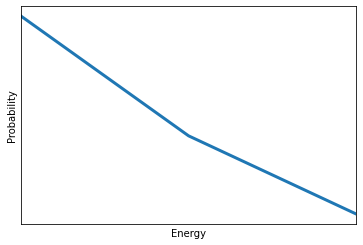

In [ ]:

temperature = 1
response = sampler.sample(model, beta_range=[1/temperature, 1/temperature], num_reads=100)

g = {} # dictionary that associate to each energy E the degeneracy g[E]
for solution in response.aggregate().data():
    if solution.energy in g.keys():
        g[solution.energy] += 1
    else:
        g[solution.energy] = 1
print("Degeneracy", g)
probabilities = np.array([g[E] * np.exp(-E/temperature) for E in g.keys()])
Z = probabilities.sum()
probabilities /= Z
fig, ax = plt.subplots()
ax.plot([E for E in g.keys()], probabilities, linewidth=3)
ax.set_xlim(min(g.keys()), max(g.keys()))
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Energy')
ax.set_ylabel('Probability')
plt.show()

Count the number of states such that $E(X1​,...,Xn​)=E$. This number is called the **degeneracy** of the energy level $E$, and often noted $g(E)$.

Building a maximum a posteriori inference on our Ising model. We clamp the first spin to -1 and run simulated annealing for the rest of them to find the optimal configuration. We modify the simulated annealing routine in dimod to account for the clamping.

In [ ]:
from dimod.reference.samplers.simulated_annealing import greedy_coloring

clamped_spins = {0: -1}
num_sweeps = 1000
βs = [1.0 - 1.0*i / (num_sweeps - 1.) for i in range(num_sweeps)]

# Set up the adjacency matrix.
adj = {n: set() for n in h}
for n0, n1 in J:
    adj[n0].add(n1)
    adj[n1].add(n0)
# Use a vertex coloring for the graph and update the nodes by color
__, colors = greedy_coloring(adj)

spins = {v: np.random.choice((-1, 1)) if v not in clamped_spins else clamped_spins[v]
         for v in h}
for β in βs:
    energy_diff_h = {v: -2 * spins[v] * h[v] for v in h}

    # for each color, do updates
    for color in colors:
        nodes = colors[color]
        energy_diff_J = {}
        for v0 in nodes:
            ediff = 0
            for v1 in adj[v0]:
                if (v0, v1) in J:
                    ediff += spins[v0] * spins[v1] * J[(v0, v1)]
                if (v1, v0) in J:
                    ediff += spins[v0] * spins[v1] * J[(v1, v0)]

            energy_diff_J[v0] = -2. * ediff
        for v in filter(lambda x: x not in clamped_spins, nodes):
            logp = np.log(np.random.uniform(0, 1))
            if logp < -1. * β * (energy_diff_h[v] + energy_diff_J[v]):
                spins[v] *= -1

Running this algorithm, we can obtain the most likely configuration:

In [ ]:
spins

{0: -1, 1: 1, 2: -1}

## Quantum_Phase_Estimation

### Quantum Fourier Transform

In [ ]:
q0 = cirq.GridQubit(0,0)
q1 = cirq.GridQubit(1,0)
q2 = cirq.GridQubit(2,0)
qft = Circuit.from_ops(
    cirq.H(q0),
    cirq.CZ(q1, q0)**0.5,
    cirq.H(q1),
    cirq.CZ(q2, q0)**0.25,
    cirq.CZ(q2, q1)**0.5,
    cirq.H(q2)
)

In [ ]:
plot_circuit(qft)

### Quantum Phase Estimation